In [713]:
import pandas as pd 
from datetime import datetime    # To access datetime 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import Series        # To work on series 
import sklearn
import statsmodels
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (20,10)

In [714]:
data = pd.read_csv('2014-2019.csv')


In [715]:
data

,Datetime,Demand
0,20-03-14 7:30,1526.40
1,20-03-14 7:45,1609.92
2,20-03-14 8:00,1621.44
3,20-03-14 8:15,1704.96
4,20-03-14 8:30,1785.60
...,...,...
194498,05-11-19 9:15,3559.68
194499,05-11-19 9:30,3484.80
194500,05-11-19 9:45,3588.48
194501,05-11-19 10:00,3634.56


In [716]:
data['Datetime'] = pd.to_datetime(data.Datetime, format='%d-%m-%y %H:%M')
data


,Datetime,Demand
0,2014-03-20 07:30:00,1526.40
1,2014-03-20 07:45:00,1609.92
2,2014-03-20 08:00:00,1621.44
3,2014-03-20 08:15:00,1704.96
4,2014-03-20 08:30:00,1785.60
...,...,...
194498,2019-11-05 09:15:00,3559.68
194499,2019-11-05 09:30:00,3484.80
194500,2019-11-05 09:45:00,3588.48
194501,2019-11-05 10:00:00,3634.56


In [717]:
data.set_index('Datetime', inplace = True)


In [718]:
for count, value in enumerate(data.values, start=0):  # Can improve it.
    if value <= 400 or value >= 20000 or pd.isna(data.values[count]): #ps.isna checks if data is na
        data.values[count] = data.values[count - 168*4]  # Takes previous week's value

# for count, value in enumerate(data.values, start=0):  # Can improve it.
#     if value <= 400 or value >= 20000:
#         data.values[count] = data.values[count - 168*4]  # Takes previous week's value

In [719]:
data=data['2015':]
data


,Demand
Datetime,
2015-01-01 00:00:00,463.68
2015-01-01 00:15:00,440.64
2015-01-01 00:30:00,434.88
2015-01-01 00:45:00,443.52
2015-01-01 01:00:00,460.80
...,...
2019-11-05 09:15:00,3559.68
2019-11-05 09:30:00,3484.80
2019-11-05 09:45:00,3588.48


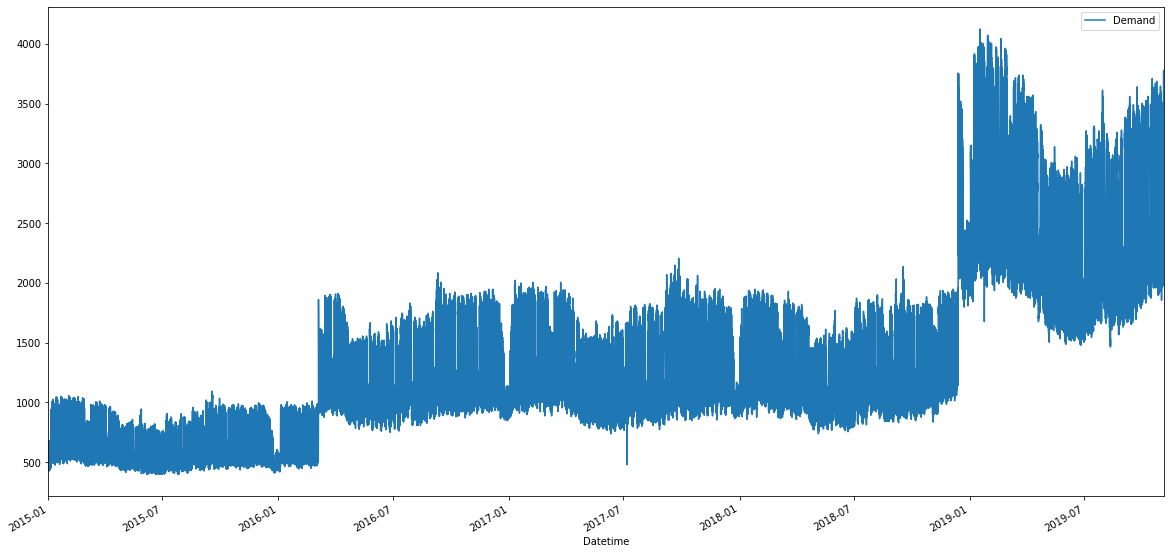

In [720]:
data.plot()

In [721]:
data = data.resample('D').mean()

# data = data.resample('D').max()
datacopy = data.copy()

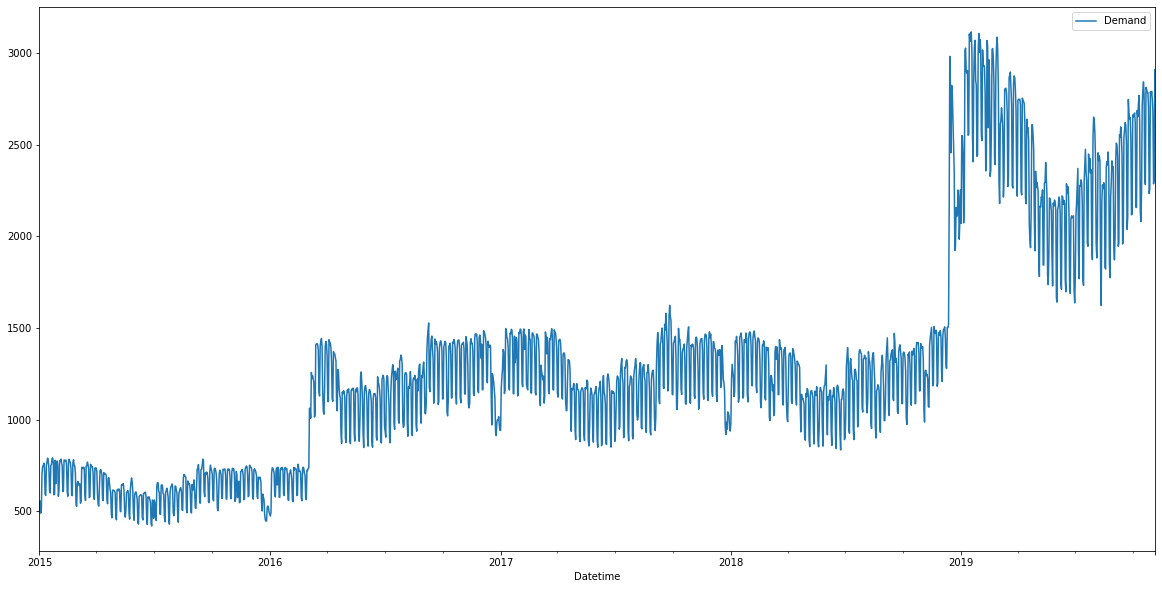

In [722]:
data.plot()

### Converting series to stationary
Stationary means mean, variance and covariance is constant over periods.

In [723]:
from statsmodels.graphics.tsaplots import plot_acf

In [724]:
data_diff = data.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model
data_diff = data_diff[1:]
data_diff.tail()

,Demand
Datetime,
2019-11-01,-68.940000
2019-11-02,-393.120000
2019-11-03,30.180000
2019-11-04,592.800000
2019-11-05,-297.137143


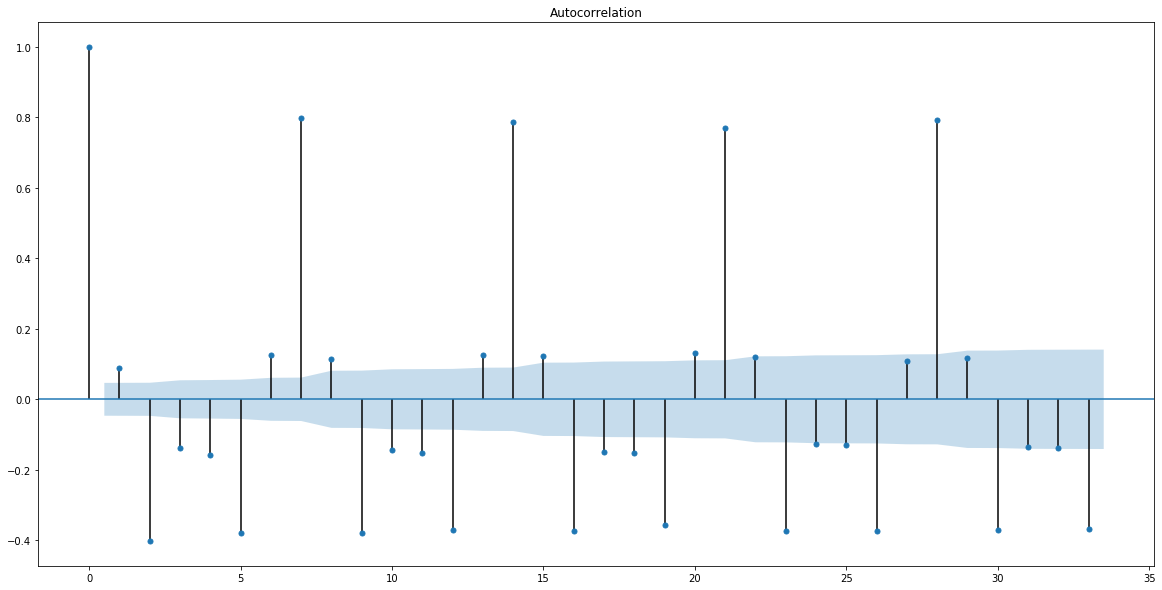

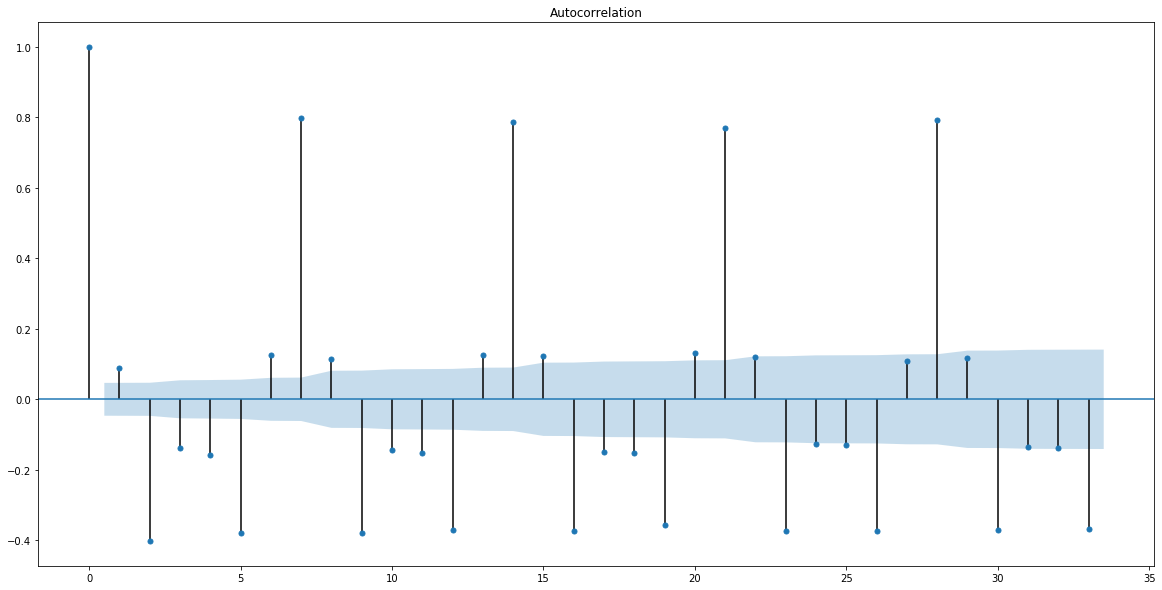

In [725]:
plot_acf(data_diff)


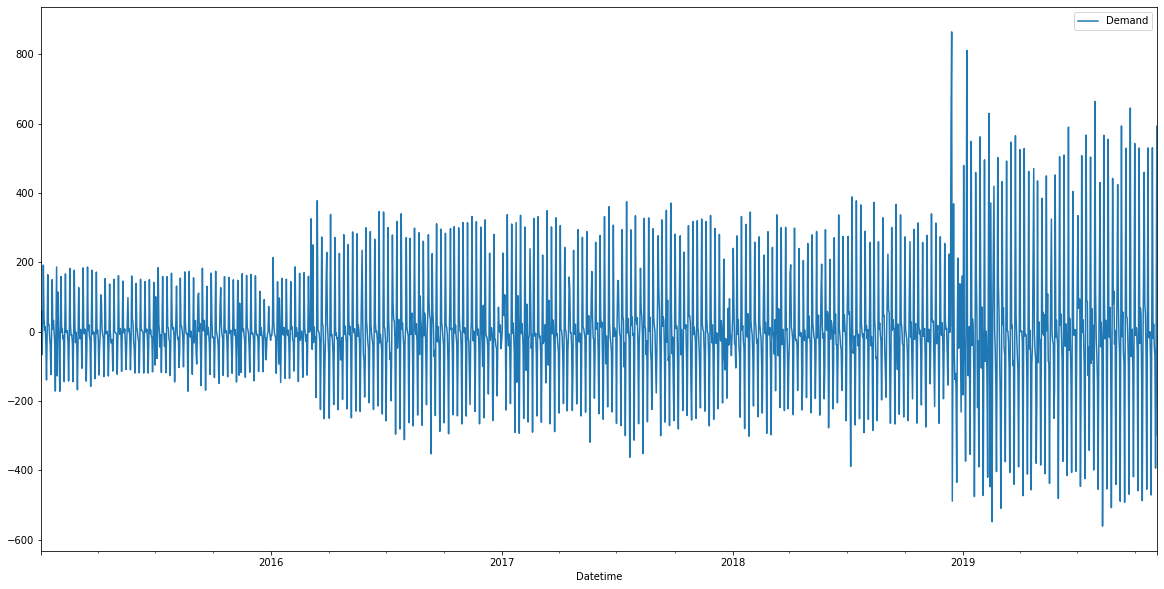

In [726]:
data_diff.plot()

In [727]:
X = data.values
split=int(len(X)-31) #Takes about 95% of data
train = X[:split]
test = X[split:]
predictions = []
len(test)

31

In [728]:
X.size == (train.size + test.size)

True

# Autoreggresive AR Model

In [729]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [730]:
predictions=model_ar_fit.predict(start=split,end=len(X)-1) #Was longer by one prediction

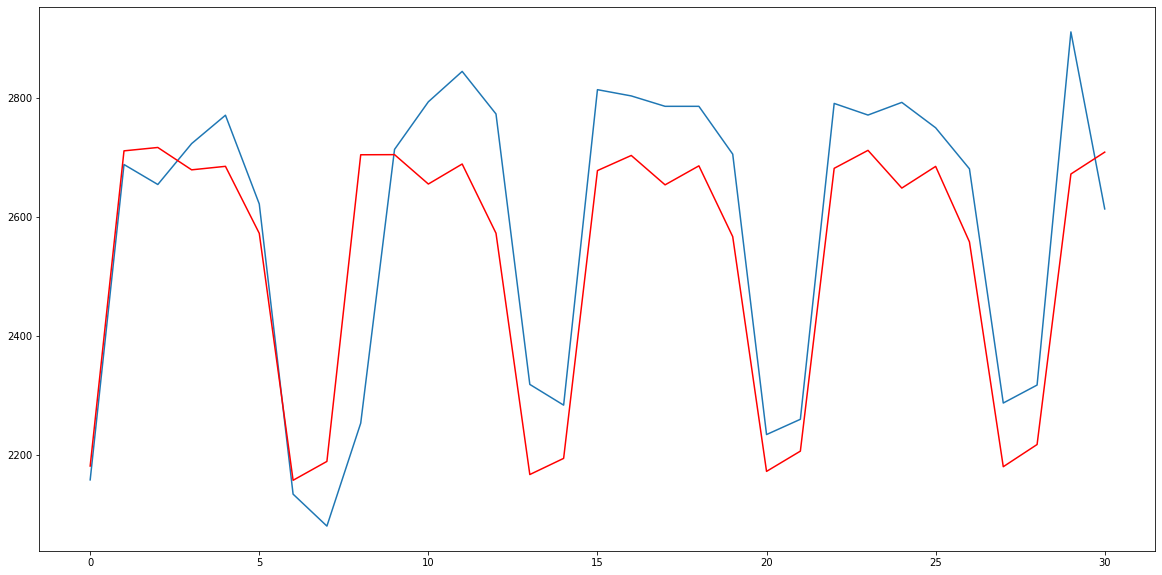

In [731]:
plt.plot(test)
plt.plot(predictions,color='red')

In [732]:
len(test) == len(predictions)

True

In [733]:
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
rmse

135.66452103921029

# ARIMA model

In [734]:
from statsmodels.tsa.arima_model import ARIMA

In [735]:
# import warnings
# warnings.filterwarnings('ignore')

In [736]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
""" Current Best Values For Previous 31 days
(6, 1, 7) 107
(11, 1, 13) 113
(8, 1, 8) 118
(12,1,11) 124
(5, 1 , 7) 122
(13, 1, 4) 122
(6, 1, 5) 122
(7,1,5) 125
(13, 1, 11) 125
(14, 1, 11) 127
"""
pdq =6,1,7
model_arima = ARIMA(train,order=(pdq))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

19962.014442281605


In [737]:
predictions= model_arima_fit.forecast(steps=len(test))[0]
predictions[:10]

array([2137.54050888, 2634.72013655, 2698.4761361 , 2713.07625217,
       2697.31280731, 2624.34267744, 2183.38031773, 2158.36941373,
       2655.31672898, 2719.10863833])

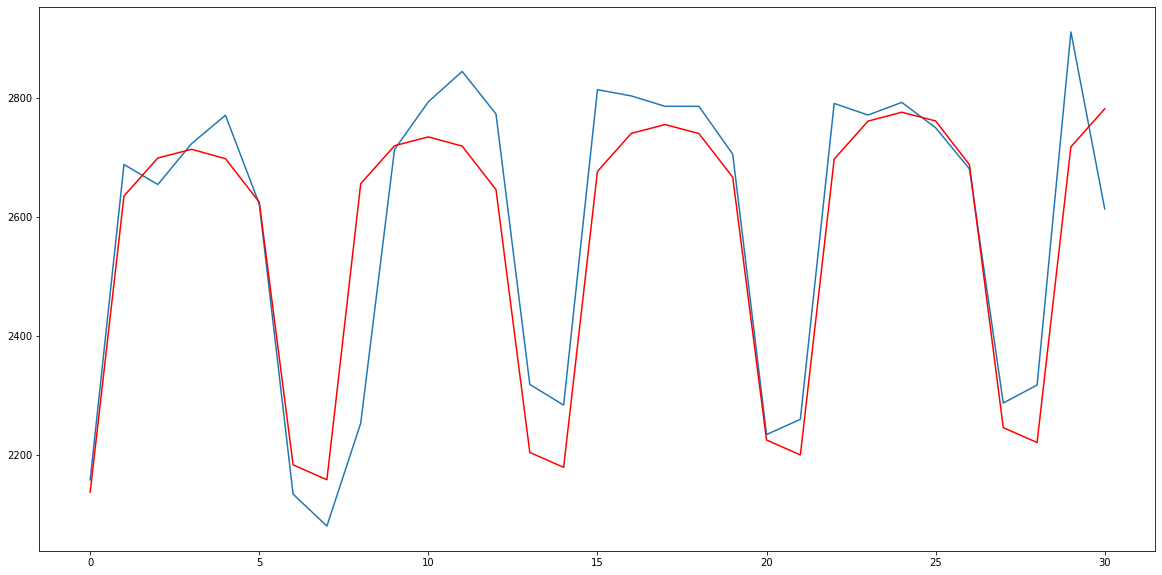

In [738]:
plt.plot(test)
plt.plot(predictions,color='red')

In [739]:
len(test) == len(predictions)

True

In [740]:
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
rmse

107.27835556849682

In [741]:
# summation = 0
# for i in test:
#     for j in predictions:
#         value = abs((i-j)/i)
#         summation += value
    
# MAPE = (summation/len(test))
# MAPE

In [742]:
# import itertools
# p=q=range(0,16)
# d=range(0,3)
# pdq = list(itertools.product(p,d,q)) #All possible combinations

In [743]:
# import warnings
# warnings.filterwarnings('ignore')
# array = []
# for param in pdq:
#     try:
#         model_arima = ARIMA(train,order=param)
#         model_arima_fit = model_arima.fit()
#         predictions= model_arima_fit.forecast(steps=len(test))[0]
#         mse = mean_squared_error(test, predictions)
#         rmse = sqrt(mse)
#         array.append(rmse)
#         print(param,rmse)
#     except:
#         continue
    